# HR Analytics : Job Change of Data Scientists
- https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

## Data introduction

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
mpl.style.use('seaborn')
mpl.rcParams["font.family"] = font_name
mpl.rcParams["font.size"] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.unicode_minus'] = False

train = pd.read_csv('../data/aug_train.csv')
# pre_train = pd.read_csv('processing_missing_value.csv')
test = pd.read_csv('../data/../data/aug_test.csv')
submission = pd.read_csv('../data/sample_submission.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

- enrollee_id : 후보자 고유 ID
- city: 도시 코드
- city_ development _index : 도시 개발  지수
- gender: 후보자의 성별
- relevent_experience: 관련 경험 유/무
- enrolled_university: 대학 입학 여부
- education_level: 지원자의 교육 수준
    - Primary School    초등학교 졸업
    - High School       중/고등학교 졸업
    - Graduate          학사
    - Masters           석사
    - Phd               박사
- major_discipline : 주전공
- experience: 경력(년)
- company_size: 현재 회사의 직원 수
- company_type : 현재 회사 타입
    - Pvt Ltd 비상장회사
    - Funded Startup 투자받은 스타트업
    - Public Sector 공기업
    - Early Stage Startup 초기 스타트업
    - NGO  non-governmental organization 비정부기구
- last_new_job: 현재 직장 직전 공백기
- training_hours: 교육이수시간
- target: 이직희망여부 0 – 이직을 찾고 있지 않음, 1 – 이직을 찾고 있음

## EDA (Exploratory Data Analysis) 

### missing value

In [10]:
train.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

In [11]:
# ---> 시각화 넣기!

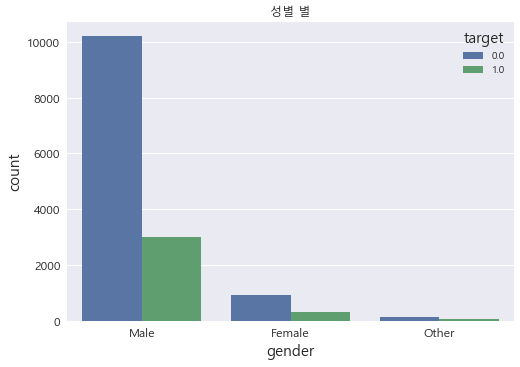

In [12]:
sns.countplot(x='gender', hue='target', data=train)
plt.title('성별 별')
plt.show()

## 학력, 전공, 대학 과정, 직무 관련 경험에 따른 이직 생각 시각화

## Preprocessing

In [ ]:
2. 전처리
   - 파생변수, 이상치, 결측치 등등 내용
---------------------->??? 나눠서  진행 (전처리와 튜닝하는 부분은 동시에 하지 않고 둘 중 한가지만 바꿔가며 확인 후 나머지 하나 ㄱㄱ)

결측치 처리 (500 이하)
- 'education_level', 'enrolled_university', 'experience', 'last_new_job'

gender 결측치
- nan값 반반으로 male, famalse

commany_size, type 결측치
- unknown 으로 재정의

major 결측치
- major랑 non_major로 나누기(nan값은 non_major 으로)

## Modeling

3. 모델링
   - 어떤 모델을 사용하는지, 튜닝은 어떻게 하는지

---------[전체적은 진행 flow 발표]------------


base line model을 만든다. (기본값만)
ex) knn, xgb, rf... -- > 기본값만 넣고 먼저 하기

그 다음 전처리 (이상치, 결측치, 스케일링, 새로운 변수 생성 등등) 
--  머신러닝은 전처리를 잘해야 성능이 잘나옴

-- 전처리는 할 때 마다 저장하는게 좋다.
( sscaler or mmscaler 다 써보기 )

전처리로 더 이상 성능을 올릴 수 없으면  그 다음 부터 튜닝 ㄱㄱ